In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Les recettes Italiennes

In [2]:
df = pd.read_csv('./gz_recipe.csv')
df.head()

,Unnamed: 0,Nome,Categoria,Link,Persone/Pezzi,Ingredienti,Steps
0,0,Tiramisù,Dolci,https://ricette.giallozafferano.it/Tiramisu.html,8,"[['Mascarpone', '750g'], ['Uova', '260g'], ['S...",Per preparare il tiramisù preparate il caffé c...
1,1,Cookies,Dolci,https://ricette.giallozafferano.it/Cookies.html,12,"[['Farina 00', '195g'], ['Burro', '100g'], ['B...","Per preparare i cookies, assicuratevi che il b..."
2,2,Pancake allo sciroppo d'acero,Dolci,https://ricette.giallozafferano.it/Pancakes-al...,4,"[['Burro', '25g'], ['Farina 00', '125g'], ['Uo...",Iniziamo la preparazione dei pancake fondendo ...
3,3,Crema al mascarpone,Dolci,https://ricette.giallozafferano.it/Crema-al-ma...,4,"[['Mascarpone', '500g'], ['Zucchero', '125g'],...",Per preparare la crema al mascarpone versate i...
4,4,Crepe dolci e salate (ricetta base),Dolci,https://ricette.giallozafferano.it/Crepes-dolc...,15,"[['Uova', '3'], ['Farina 00', '250g'], ['Latte...",Per preparare le crepe dolci e salate iniziate...


### Code

In [4]:
row = df['Ingredienti'][0]
def getIngredient(row):
    row = row[2:-2]
    row = row.split('], [')
    res = []
    for item in row : 
        item = item.split(', ')
        tempres = []
        for item2 in item:
            tempres += [item2[1:-1]] 
        res += [tempres]
    return res
getIngredient(row)

[['Mascarpone', '750g'],
 ['Uova', '260g'],
 ['Savoiardi', '250g'],
 ['Zucchero', '120g'],
 ['Caffè', '300g'],
 ['Cacao amaro in polvere', 'q.b.']]

In [13]:
def getAllIng(df):
    allingredients = []
    for row in df['Ingredienti']:
        allingredients += [getIngredient(row)]
    return allingredients
ingredients = getAllIng(df)
print(len(ingredients))

5939
[['Mascarpone', '750g'], ['Uova', '260g'], ['Savoiardi', '250g'], ['Zucchero', '120g'], ['Caffè', '300g'], ['Cacao amaro in polvere', 'q.b.']]


In [18]:
def getAllUniqueIngredients(ing):
    res = []
    for recipe in ing : 
        for ingredient in recipe:
            res += [ingredient[0]]

    uniques, counts = np.unique(res, return_counts=True)
    print(uniques)
    print(len(uniques))
    print(len(ing))
    return uniques, counts

un_ing, counts_ing = getAllUniqueIngredients(ingredients)

['' 'Abbacchio' 'Acai in polvere' ... 'Zucchine trombetta' 'codette'
 'zenzero candito']
1642
5939


##  Répartition des Types de plats

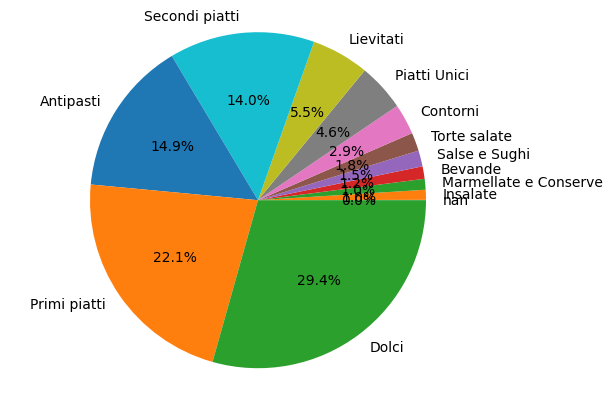

In [7]:
def showCamembertCat(categorie):
    cat = categorie.to_list()
    val, counts = np.unique(cat, return_counts=True)
    sort = np.argsort(counts)
    fig1, ax1 = plt.subplots()
    ax1.pie(counts[sort], labels=val[sort], autopct='%1.1f%%')
    ax1.axis('equal')
    plt.show()

showCamembertCat(df['Categoria'])

### Code

In [15]:
#nbMoyen Ingredients
nbing =0 
for recipe in ingredients:
    nbing+= len(recipe)
nb_ing_moy = nbing/len(ingredients)
print("nombre d'ingredients par recette en moyenne : ", nb_ing_moy)

nombre d'ingredients par recette en moyenne :  10.963630240781276


### Top 20 des ingrédients les plus utilisés

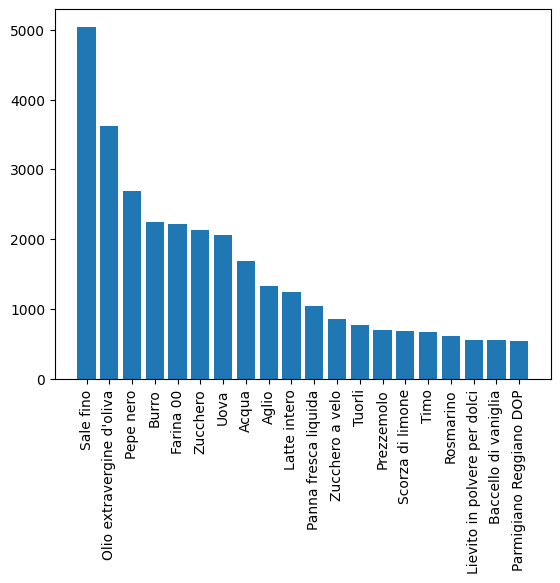

In [85]:
def showPlotBestIng(un_ing, counts_ing):
    sort = np.argsort(counts_ing)
    un_ing = np.flip(un_ing[sort][-20:])
    counts_ing = np.flip(counts_ing[sort][-20:])
    fig, ax = plt.subplots()
    plt.xticks(rotation='vertical')
    ax.bar(un_ing, counts_ing)
showPlotBestIng(un_ing, counts_ing)


### Distribution du nombre de portions

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  30  32  33  34  35  36  38  40  42
  44  45  48  50  60  70  80 100 125] [ 318  165   25 2815   47  694   14  665   17  275    7  292    9   23
   55   51    1   40    2   98    5   22   47   32    9    5    6   63
   10    1    1   22    3    3   42    3    2    6    2   20   14    1
    4    2    1]


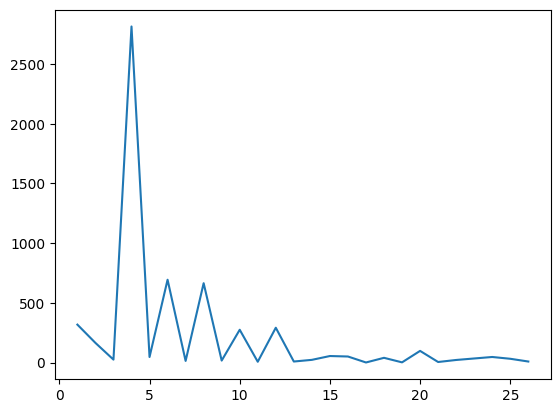

In [73]:
def showPlotServings(df):
    servings = df['Persone/Pezzi'].to_list()
    val, counts = np.unique(servings, return_counts=True)
    plt.plot(val[:25],counts[:25])
showPlotServings(df)

### Portions allant jusqu'a 125...

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  30  32  33  34  35  36  38  40  42
  44  45  48  50  60  70  80 100 125] [ 318  165   25 2815   47  694   14  665   17  275    7  292    9   23
   55   51    1   40    2   98    5   22   47   32    9    5    6   63
   10    1    1   22    3    3   42    3    2    6    2   20   14    1
    4    2    1]


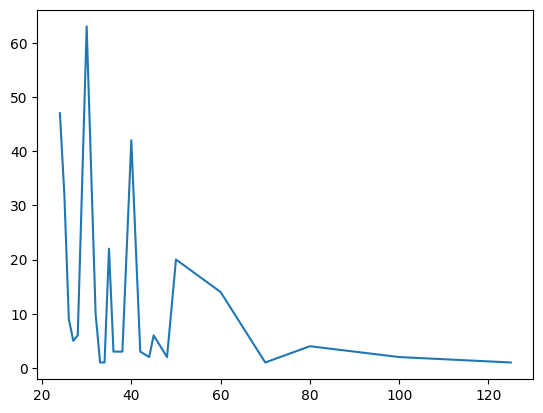

In [94]:
def showPlotServingsWeird(df):
    servings = df['Persone/Pezzi'].to_list()
    val, counts = np.unique(servings, return_counts=True)
    plt.plot(val[22:],counts[22:])
showPlotServingsWeird(df)

## Statistics

In [98]:
print("Nombre de recettes : ", len(df))
print("Nombre d'ingrédients uniques : ",len(un_ing))
print("Nombre d'ingrédients par recette en moyenne : ", nb_ing_moy)

Nombre de recettes :  5939
Nombre d'ingrédients uniques :  1642
Nombre d'ingrédients par recette en moyenne :  10.963630240781276


### Nombre d'ingredients par Categorie ?